# Problem
The bar with different cross sections is loaded with force F at node 3. Node 1 is fixed. The material properties are listed on the side of each element. Please use finite element method to find the displacement for node 2, 3, and stress in each element. Your solution should have detailed steps on the connectivity matrix, stiffness assembly, applying boundary conditions, and solution of displacement and stress.
<div>
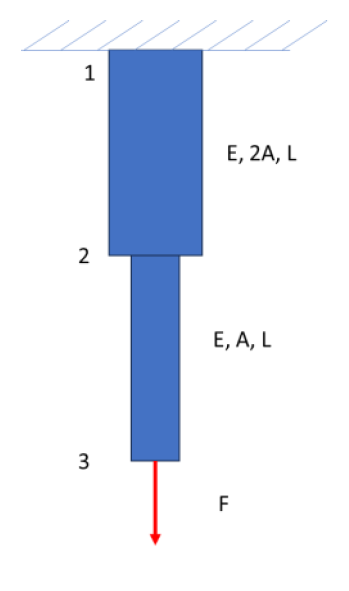
</div>

# Solution

## Connectivity

$$Elem = \begin{bmatrix}
1&2\\
2&3
\end{bmatrix}$$

## Stiffness and force vector

The stiffness matrix and force vector for element 1: $$k^{(1)}=\dfrac{2EA}{L}\begin{bmatrix}
1&-1\\
-1& 1
\end{bmatrix}\begin{matrix}
u_1\\
u_2
\end{matrix}, \hspace{1cm} f^{(1)}=\begin{bmatrix}
R\\
f_2^{(1)}
\end{bmatrix}$$
The stiffness matrix and force vector for element 2: $$k^{(2)}=\dfrac{EA}{L}\begin{bmatrix}
1&-1\\
-1& 1
\end{bmatrix}\begin{matrix}
u_2\\
u_3
\end{matrix},\hspace{1cm} f^{(2)}=\begin{bmatrix}
f_2^{(2)}\\
F
\end{bmatrix}$$

## Assembly

The global stiffness $K$ and force vector $f$ can be obtained through assembly:
$$K=\dfrac{EA}{L}\begin{bmatrix}
2&-2 & 0\\
-2& 2+1 &-1\\
0 & -1 & 1
\end{bmatrix}\begin{matrix}
u_1\\
u_2\\
u_3
\end{matrix},\hspace{1cm} f=\begin{bmatrix}
R\\
f_2^{(1)}+f_2^{(2)}=0\\
F
\end{bmatrix}$$

## Boundary conditions and solution

Solving the matrix $$Ku=f$$ by subsituting boundary condition $u_1=0$, so we have
$$\dfrac{EA}{L}\begin{bmatrix}
3 &-1\\
-1 & 1
\end{bmatrix}\begin{bmatrix}
u_2\\
u_3
\end{bmatrix}=\begin{bmatrix}
0\\
F
\end{bmatrix}\longrightarrow\begin{bmatrix}
u_2\\
u_3
\end{bmatrix}=\begin{bmatrix}
\dfrac{FL}{2EA}\\
\dfrac{3FL}{2EA}
\end{bmatrix}$$

## Stress

Stress $\sigma = E\epsilon = E\dfrac{u_j-u_i}{L}$

For element 1: $$\sigma^{(1)} = E\epsilon^{(1)} = E\dfrac{u_2-u_1}{L}=\dfrac{F}{2A}$$
For element 2: $$\sigma^{(2)} = E\epsilon^{(2)} = E\dfrac{u_3-u_2}{L}=\dfrac{F}{A}$$

So the stresses are $\sigma_1 =\dfrac{F}{2A}, \sigma_2 = \dfrac{F}{A} $

## discussion

It makes sense as the internal force should be the same for both bars (a free body diagram can get there). The cross section is doubled in element 1, the stress should be half. 


# Code solution (how to)
of course you cannot do it during the quiz. This is provided to show how you can solve the problem using `sympy`

In [191]:
# using code to solve the problem
import sympy as sp # use symbolic python taking derivative
#import handcalcs.render # render
#import numpy as np # numerical python library
#import matplotlib.pyplot as plt

In [192]:
F,E,A,L,u_1,u_2,u_3 = sp.symbols('F E A L u_1 u_2 u_3') # define it as symbols
u_1 = 0
sp.init_printing(use_unicode=True)
#system = sp.Matrix(( (3*E*A/L, -E*A/L, 0), (-E*A/L, E*A/L, F)))
#sol=sp.solve_linear_system(system, u_2, u_3,dict=True)

sol=sp.solve([3*E*A/L*u_2 -E*A/L*u_3,
              -E*A/L*u_2+E*A/L*u_3-F], [u_2, u_3], dict=True)
sol

In [193]:
sigma_1 = E*(sol[0][u_2]-u_1)/L
sigma_1

In [194]:
sigma_2 = E*(sol[0][u_3]-sol[0][u_2])/L
sigma_2